**<h1>Your very fist project</h1>**

**You can use Google but please don't use ChatGPT or Gemini or any other generative AI. You are here to learn.**

**Dataset Link:** https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

**M - Malignant (cancerous)<br>
B - Benign (non-cancerous)**

**Instructions:<br>
Step 1:Load the dataset using pandas<br>
Step 2:Explore the dataset by printing out few rows, shape of df, info of df, column names etc.<br>
Step 3: Check for null values and handle them (if any). Drop the Id column.<br>
Step 4: Use your knowledge of feature selection using correlation matrix to select 10 features out of 31. Give proper reasons for the same.<br><br>**
*Use this code:<br>*
*import seaborn as sns<br>*
*df1 = df[ list_of_column_names_required ]<br>*
*dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)<br><br>*
*Select two features from column_list_1 = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean']<br><br>*
*Select 6 features from column_list_2 = ['diagnosis','concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']<br><br>*
*Select 2 features from column_list_3 = ['diagnosis','concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
        'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',]<br><br>*
**Step 5: Exploratory Data Analysis. Think what you can plot which can convey some useful information. One bar plot, one pie chart and one scatter plot is required. Give proper reasoning of what you have plot.<br>
Step 6: Divide df_new (dataframe which only have the selected 10 columns) into X and Y<br>
Step 7: Perform train test split with test_size = 0.2<br>
Step 8: Normalise<br>
Step 9: Train a logistic regression model and print out the classification report (explore from internet) after predicting on X_test<br>
Step 10: Train a SVC and print out the classification report<br>
Step 11: Train KNN and print out the classification report<br>
Step 12: Choose a metric on which you will compare the models. Give proper reason why you chose that metric.<br>
Step 13: Using the above metric, state your best model.<br>
Step 14: Suppose for example SVC was your best model. Now train a new SVC model but this time consider all the columns of the dataset. Follow the same steps to divide the df into X and Y, performing split,etc.<br>
Step 15: Now compare this model with the best model achieved in Step 13.<br>
Step 16: Write in 2 lines what you observe. Can you also tell why you observe?**

**After Step 16, assignment ends. <br>
Please submit on teams before deadline.<br>
HURRAY!! You have made your very first ML project. More to come soon!**

# Cell 1: Import necessary libraries and load the dataset

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Explore the dataset

In [28]:
print(df.head())  # Print the first few rows
print(df.shape)  # Print the shape of the DataFrame
print(df.info())  # Print information about the DataFrame
print(df.columns)  # Print the column names

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Preprocess the dataset

In [29]:
# Drop the 'Id' column and rows with null values

df = df.drop(columns=['id'])  
df = df.dropna()

In [30]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [31]:
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

# Feature selection using correlation matrix

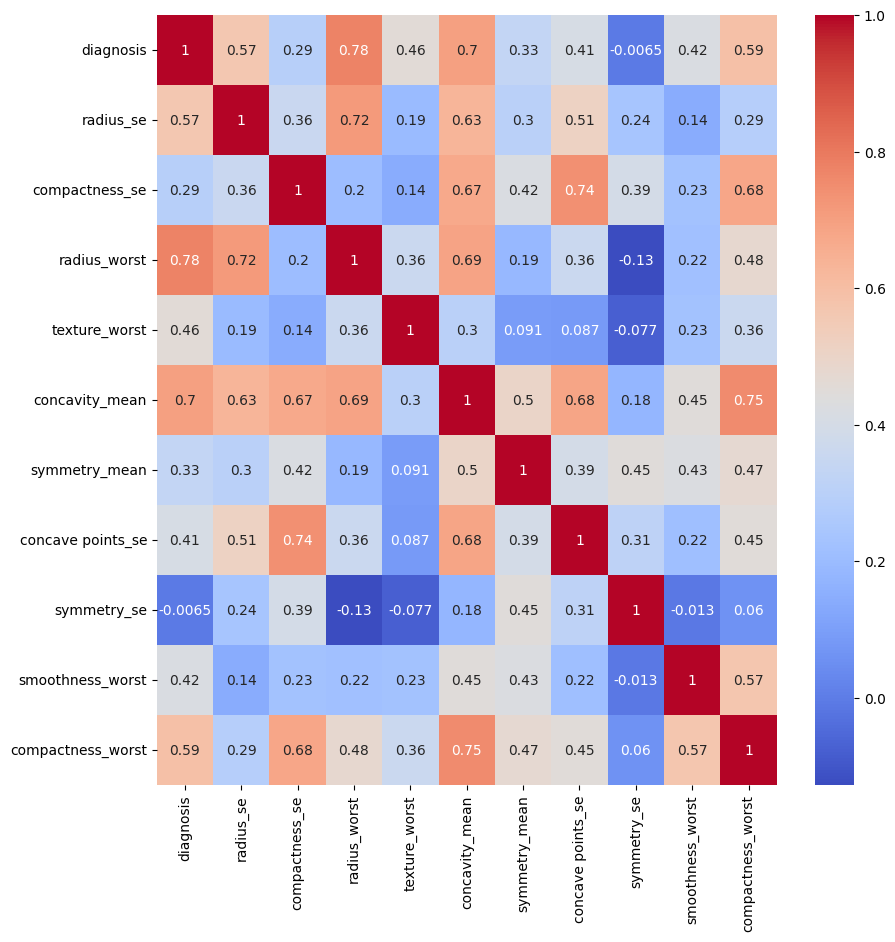

In [32]:
df1 = df[['diagnosis','radius_se', 'compactness_se', 'radius_worst', 'texture_worst',
              'concavity_mean','symmetry_mean',
          'concave points_se', 'symmetry_se','smoothness_worst','compactness_worst'
       ]]
list_of_column_names_required1 = ['diagnosis', 'radius_mean', 'texture_mean',  'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean']
list_of_column_names_required2 = ['diagnosis','concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'smoothness_worst',
       'compactness_worst', ]
list_of_column_names_required3 = ['diagnosis','perimeter_worst']

plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)
sns.histplot(kde=True)
plt.show()

# Select features based on the instructions

In [33]:
selected_features = ['diagnosis','radius_se', 'compactness_se', 'radius_worst', 'texture_worst',
              'concavity_mean','symmetry_mean',
          'concave points_se', 'symmetry_se','smoothness_worst','compactness_worst'
       ]

df2 = df[selected_features]

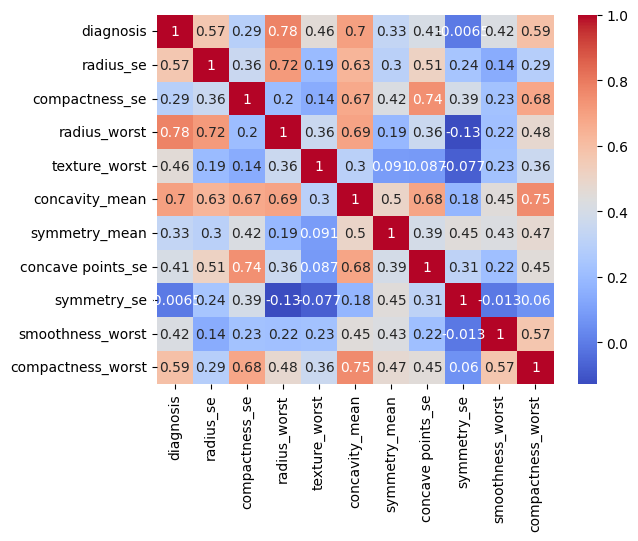

In [34]:
sns.heatmap(df2.corr(), cmap="coolwarm", annot=True)
sns.histplot(kde=True)
plt.show()

# Exploratory Data Analysis (EDA)

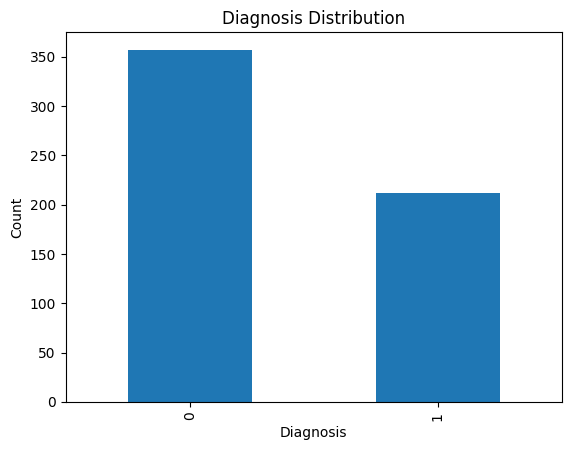

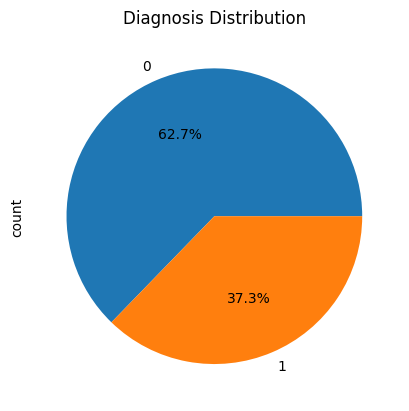

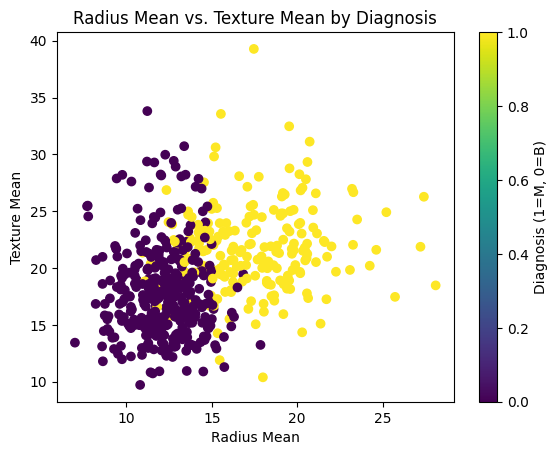

In [35]:
# Bar plot for diagnosis distribution
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Pie chart for diagnosis distribution
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diagnosis Distribution')
plt.show()

# Scatter plot for radius mean vs. texture mean by diagnosis
plt.scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'])
plt.title('Radius Mean vs. Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.colorbar(label='Diagnosis (1=M, 0=B)')
plt.show()

# Prepare the data for modeling

In [ ]:
df_new = df[selected_features]
X = df_new.drop('diagnosis', axis=1)
Y = df_new['diagnosis']
# print(X.head()) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate a logistic regression model

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(Y_test, Y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Train and evaluate a SVC model

In [38]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Train and evaluate a KNN model

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Hence by the above scores I considered the SVC model is the most accurate model

## Step14

In [40]:
df_new2 = df
X2 = df_new2.drop('diagnosis', axis=1)
Y2 = df_new2['diagnosis']
print(X2.head())
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [41]:
svc2 = SVC()
svc2.fit(X_train2, Y_train2)
Y_pred_svc2 = svc2.predict(X_test2)
print(classification_report(Y_test2, Y_pred_svc2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

